In [20]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [21]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual


## Problem Statement

Maximise 3 x1 + 5 x2

Constraints

- x1 <= 4
- 2 x2 <= 12
- 3 x1 + 2 x2 <= 18

In [22]:
num_points = 49
x1_ub = 10
x2_ub = 10

In [23]:
x1_range = np.linspace(0, x1_ub, num_points)
x2_range = np.linspace(0, x2_ub, num_points)

In [24]:
constr_1 = np.array([4]*len(x1_range))
constr_2 = np.array([6]*len(x1_range))

constr_3 = -1.5*x1_range  +9

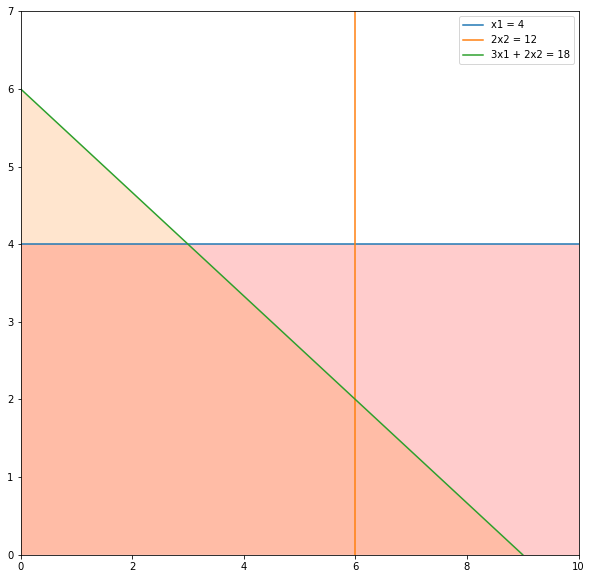

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.plot(x1_range, constr_1, label='x1 = 4')
ax.fill_between(x1_range, 0, constr_1, facecolor='red', alpha=0.2)
ax.plot(constr_2, x1_range, label='2x2 = 12')
ax.fill_between(0, constr_2, x1_range, alpha=0.2)
ax.plot(constr_3, x1_range, label='3x1 + 2x2 = 18')
ax.fill_between(constr_3, 0, x1_range, alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.legend()
plt.show()

In [26]:
def get_constr_1(constr_1_val):
    return x1_range, constr_1_val*np.ones(shape=x1_range.shape)


In [27]:
def get_constr_2(constr_2_val):
    return constr_2_val*np.ones(shape=x1_range.shape), x1_range


In [28]:
def get_constr_3(coeff, intercept):
    return coeff*x1_range+intercept, x1_range


## Search Space Visualisation

In [29]:
%matplotlib inline
@interact
def plot_search_space(constr_1_val=(0, 8, 0.5), 
                      constr_2_val = (0, 12, 0.5), 
                      coeff = (-5, -1, 0.5),
                      intercept=(1, 18, 0.5),
                      unbound_1 = [False, True],
                      unbound_3 = [False, True]
                     ):
    
    fill_1 = 0
    symbol_1 = "<="
    symbol_3 = "<="
    fill_3 = 0

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    
    x, y = get_constr_1(constr_1_val)
    if unbound_1:
        fill_1=10
        symbol_1 = ">="
    ax.plot(x, y, label=f'x1 {symbol_1} {constr_1_val}')
    ax.fill_between(x, fill_1, y,   facecolor='red', alpha=0.2)
    
    x, y = get_constr_2(constr_2_val)
    ax.plot(x, y, label=f'2x2 <= {2*constr_2_val}')
#     ax.fill_between(0, x, y, alpha=0.2)
    
    if unbound_3:
        fill_3 = 10
        symbol_3 = ">="
    x, y = get_constr_3(coeff, intercept)
    ax.plot(x, y, label=f'x2 {symbol_3} {coeff} x1 + {intercept}')
    ax.fill_between( x, fill_3, y, alpha=0.2)
    
    plt.xlim(0, 10)
    plt.ylim(0, 7)
    plt.legend(fontsize='large')
    plt.show()
    print(constr_1_val)

interactive(children=(FloatSlider(value=4.0, description='constr_1_val', max=8.0, step=0.5), FloatSlider(value…

In [30]:
def get_objective(x1_coeff, x2_coeff, obj_intercept):
    return -(x1_coeff/x2_coeff)*x1_range + obj_intercept/x2_coeff, x1_range


In [31]:
def get_perpendicular(x1_coeff, x2_coeff):
    return (x2_coeff/x1_coeff)*x1_range, x1_range


In [32]:
%matplotlib inline
@interact
def plot_solution_space(c1_val=(0, 8, 0.5), 
                        c2_val = (0, 12, 0.5), 
                        c3_coeff = (-5, -1, 0.5),
                        c3_incpt=(1, 18, 0.5),
                        x1_coeff = (0, 6, 0.5),
                        x2_coeff = (0, 10, 0.5), 
                        obj_incpt= (10, 70, 1),
#                         plot_perpendicular=[False, True],
                        plot_feasible=[False, True]
                       ):
    
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    
    x, y = get_constr_1(c1_val)
    ax.plot(x, y, label=f'x1 = {c1_val}')
    
    x, y = get_constr_2(c2_val)
    ax.plot(x, y, label=f'2x2 = {2*c2_val}')
    
    x, y = get_constr_3(c3_coeff, c3_incpt)
    ax.plot(x, y, label=f'x2 = {c3_coeff} x1 + {c3_incpt}')
    
    x1, y1 = get_objective(x1_coeff, x2_coeff, obj_incpt)

    condition = (x1<=x+0.2)&(y1<=y+0.2)&(x1<=c2_val+0.1)&(y1<=c1_val+0.1)
    if plot_feasible:
        x1 = x1[condition]
        y1 = y1[condition]
    ax.plot(x1, y1, label=f'{obj_incpt} = {x1_coeff} x1 + {x2_coeff} x2')
#     if plot_perpendicular:
#         x, y = get_perpendicular(x1_coeff, x2_coeff)
#         ax.plot(x, y, label=f'perpendicular')
    obj = obj_incpt
    if len(x1)==0:
        obj = 0
    print('objective : ', obj, 
          [((-x1_coeff/x2_coeff)*i + obj_incpt/x2_coeff, i) for i in y1]
         )
    plt.xlim(0, 10)
    plt.ylim(0, 7)
    plt.legend()
    plt.show()

    

interactive(children=(FloatSlider(value=4.0, description='c1_val', max=8.0, step=0.5), FloatSlider(value=6.0, …

## Objective Space Visualisation

In [46]:
def objective(x1, x2):
    return 3*x1 +5*x2

In [47]:
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = objective(X1, X2)

/Users/chatty/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  after removing the cwd from sys.path.


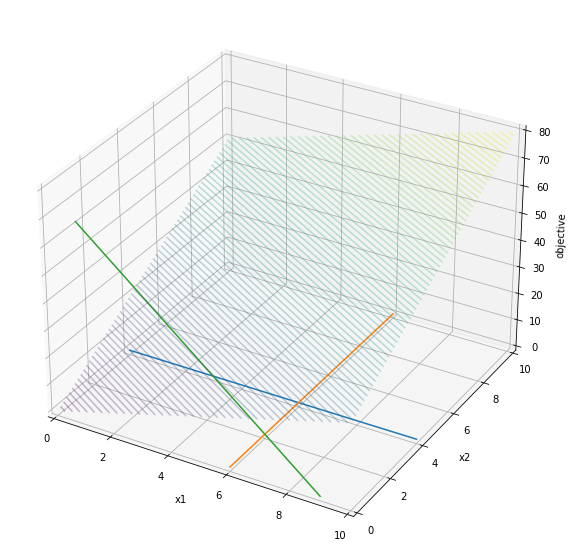

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 100, cmap='viridis', edgecolor='none', alpha=0.3)

ax.plot(x1_range, constr_1, zs=0, zdir='z', label='curve in (x,y)')
ax.plot(constr_2, x1_range, zs=0, zdir='z', label='2x2 = 6')
ax.plot(constr_3, x1_range, zs=0, zdir='z', label='3x1 + 2x2 = 18')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('objective')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()

In [18]:
condition = (x1_range <=6) &(x2_range<=4)
X1_filt, X2_filt = np.meshgrid(x1_range[x1_range <=6], x2_range[x2_range<=4])
Z_filt = objective(X1_filt, X2_filt)

/Users/chatty/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  after removing the cwd from sys.path.


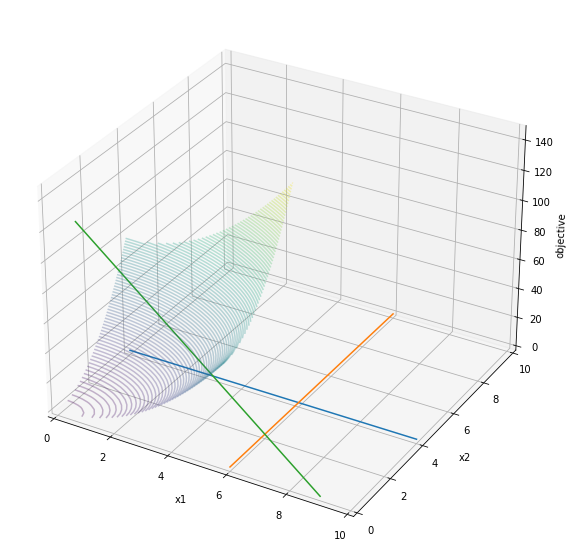

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X1_filt, X2_filt, Z_filt, 100, cmap='viridis', edgecolor='none', alpha=0.3)

ax.plot(x1_range, constr_1, zs=0, zdir='z', label='curve in (x,y)')
ax.plot(constr_2, x1_range, zs=0, zdir='z', label='2x2 = 6')
ax.plot(constr_3, x1_range, zs=0, zdir='z', label='3x1 + 2x2 = 18')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('objective')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()